## Задание 2

- решите задачу классификации на ваших данных с использованием рассмотренных моделей sklearn: knn, NB, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.
- вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score


# Импорт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [2]:
models = pd.read_csv('../../Data/neo_task_moded_norm.csv')
X_train, X_test, y_train, y_test = train_test_split(models.drop('hazardous', axis=1), models['hazardous'], test_size=0.25, random_state=42)


# Подбираем гиппер-параметры.

In [3]:
svc_optimal_n_neighbors = RandomizedSearchCV(SVC(), 
                                                {
                                                #  'probability': [True, False],
                                                #  'C': np.arange(0, 2, 0.1),
                                                #  'tol': np.arange(0, 2e-3, 1e-4),
                                                #  'degree': np.arange(0, 10, 1),
                                                #  'gamma': ['scale'] + [*np.arange(0, 1, 0.1)],
                                                #  'coef0': np.arange(0, 1, 0.1),
                                                #  'shrinking': [True, False],
                                                #  'break_ties': [True, False],
                                                #  'decision_function_shape': ['ovo', 'ovr'],
                                                #  'multi_class': ['auto', 'ovr', 'multinomial'],
                                                 'kernel': [
                                                            'linear', 
                                                            'poly', 
                                                            'rbf', 
                                                            'sigmoid', 
                                                            # 'precomputed'
                                                            ]},
                                              n_iter=5,
                                              n_jobs=-1,
                                              scoring='accuracy',
                                              random_state=71
                                              ).fit(X_train, y_train)
svc_optimal_n_neighbors.best_params_

c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'kernel': 'rbf'}

In [4]:
# knn_optimal_n_neighbors = GridSearchCV(KNeighborsClassifier(), 
#                                        {'n_neighbors': np.arange(1, 3, 1), 
#                                         # 'weights': ['uniform', 'distance'],
#                                         'algorithm': ['ball_tree', 'kd_tree', 'brute'],
#                                         'leaf_size': np.arange(1, 3, 1),
#                                         'p': np.arange(1, 3, 1),
#                                         # 'metric': np.array(distance_metrics().keys())
#                                         },
#                                         cv=2,
#                                         n_jobs=-1,
#                                         scoring='accuracy'
#                                         ).fit(X_train, y_train)
# knn_optimal_n_neighbors.best_params_

# Формула Байеса

In [5]:
svc = SVC()
svc.fit(X_train, y_train)
y_predicted_by_support_vector_machine = svc.predict(X_test)

# Оценка качества 

In [6]:
print('Accuracy')
print(accuracy_score(y_test, y_predicted_by_support_vector_machine))

Accuracy
0.9102558456999428


In [7]:
print('Confusion matrix')
print(confusion_matrix(y_test, y_predicted_by_support_vector_machine))

Confusion matrix
[[20476    45]
 [ 1993   195]]


In [8]:
print('Precision, Recall, F\n', classification_report(y_test, y_predicted_by_support_vector_machine))

Precision, Recall, F
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     20521
         1.0       0.81      0.09      0.16      2188

    accuracy                           0.91     22709
   macro avg       0.86      0.54      0.56     22709
weighted avg       0.90      0.91      0.88     22709



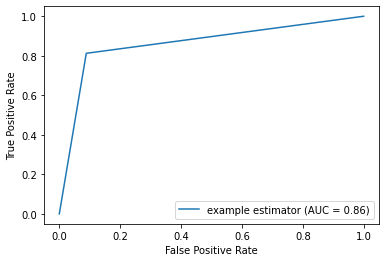

In [11]:
fpr, tpr, thresholds = roc_curve(y_predicted_by_support_vector_machine, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()